In [1]:
# Set global directories
DATA_DIR = "./data"
DATASET_DIR = f"{DATA_DIR}/datasets"

CACHE_DIR = f"{DATA_DIR}/cache"
DATASET_CACHE_DIR = f"{CACHE_DIR}/datasets"

########################################
#
TRAIN_DATA_DIR = f"/Furniture_Data"
#
# IMPORTANT: After everyone in the team has migrated the "./Furniture_Data" to
# "./data/datasets/raw", we can change the TRAIN_DATA_DIR to the following:
#
# TRAIN_DATA_DIR = f"{DATASET_DIR}/raw"
#
########################################

CLEANED_TRAIN_DATA_DIR = f"{DATASET_DIR}/cleaned"
PROCESSED_TRAIN_DATA_DIR = f"{DATASET_DIR}/processed"

# Set path to cache visualizations and models
VISUALIZATION_DIR = f"{CACHE_DIR}/visualizations"
MODEL_DIR = f"{CACHE_DIR}/models"

In [2]:
from utils.cache import reload_custom_libaries

reload_custom_libaries()

Modules ['utils.image_process'] do not exist in the current environment.
Refreshing cache for all modules...


# Import necessary packages and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from PIL import ImageFile
import os, sys
from tqdm.auto import tqdm


# Load personalize utils
from utils.image_process import image_path, img_dupChecks, imgSizeList

c:\Users\thaih\.conda\envs\Assignment2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get a general view of the dataset

In [4]:
data = tf.keras.utils.image_dataset_from_directory(TRAIN_DATA_DIR)

NotFoundError: Could not find directory /Furniture_Data

# Extract image paths into different categories base on its type

In [ ]:
# extracting paths from each of the category
beds_path = image_path(TRAIN_DATA_DIR, "beds")
chairs_path = image_path(TRAIN_DATA_DIR, "chairs")
dressers_path = image_path(TRAIN_DATA_DIR, "dressers")
lamps_path = image_path(TRAIN_DATA_DIR, "lamps")
sofas_path = image_path(TRAIN_DATA_DIR, "sofas")
tables_path = image_path(TRAIN_DATA_DIR, "tables")

print("Successfully extract all paths!")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Furniture_Data/beds'

# EDA

## Get the total amount of images in different categories before checking for duplicants

In [ ]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

NameError: name 'beds_path' is not defined

### Visualization

In [ ]:
image_Classes = {'Beds':len(beds_path),'Chairs':len(chairs_path),'Dressers':len(dressers_path),'Sofas':len(sofas_path),'Lamps':len(lamps_path),'Tables':len(tables_path) }

NameError: name 'beds_path' is not defined

In [ ]:
plt.bar(image_Classes.keys(), image_Classes.values(), width=.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

NameError: name 'image_Classes' is not defined

## Get duplicate images from each categories

### Check duplicants and remove duplicants from each categories

In [ ]:
# Get the amount of duplicants and then remove it from the dataset
print("Bed")
img_dupChecks(beds_path)
print("Chair")
img_dupChecks(chairs_path)
print("Dresser")
img_dupChecks(dressers_path)
print("Sofa")
img_dupChecks(sofas_path)

Bed


NameError: name 'beds_path' is not defined

In [ ]:
print("Lamp")
img_dupChecks(lamps_path)
print("Table")
img_dupChecks(tables_path)

Lamp


NameError: name 'lamps_path' is not defined

### Recheck the categories after removing duplicants

In [ ]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

NameError: name 'beds_path' is not defined

### Visualization

In [ ]:
image_Classes_modified = {'Beds':len(beds_path),'Chairs':len(chairs_path),'Dressers':len(dressers_path),'Sofas':len(sofas_path),'Lamps':len(lamps_path),'Tables':len(tables_path) }

Text(0, 0.5, 'Amount')

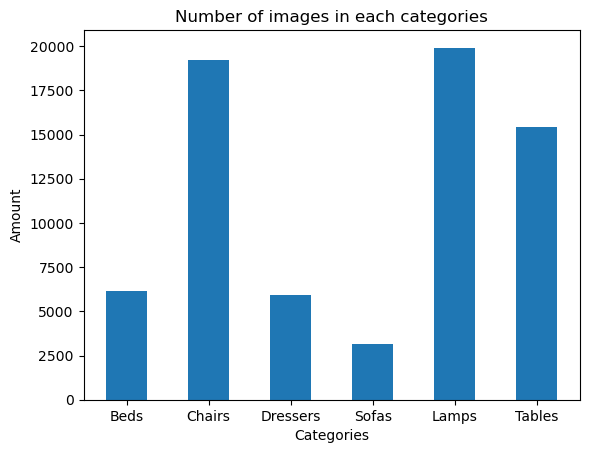

In [ ]:
plt.bar(image_Classes_modified.keys(), image_Classes_modified.values(), width=.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

-   In the plot we can see the differences between of the amount in different columns. Because of that, we will need to check for the imbalances of our dataset

## Get different amount of image size of each category

In [ ]:
print("Beds")
imgSizeList(beds_path)
print("Chairs")
imgSizeList(chairs_path)
print("Dressers")
imgSizeList(dressers_path)
print("Lamps")
imgSizeList(lamps_path)
print("sofas")
imgSizeList(sofas_path)
print("Tables")
imgSizeList(tables_path)

Beds
224x224 pixels:  6127
350x350 pixels:  2
Other size:  0
Chairs
224x224 pixels:  0
350x350 pixels:  19211
Other size:  0
Dressers
224x224 pixels:  0
350x350 pixels:  5910
Other size:  0
Lamps
224x224 pixels:  0
350x350 pixels:  19903
Other size:  0
sofas
224x224 pixels:  0
350x350 pixels:  3148
Other size:  0
Tables
224x224 pixels:  0
350x350 pixels:  15446
Other size:  1


### Visualization

#### Recheck data in each dataset

In [ ]:
df_bed_dims

,width,height
0,224,224
1,224,224
2,224,224
3,224,224
4,224,224
...,...,...
6124,224,224
6125,224,224
6126,224,224
6127,224,224


In [ ]:
df_chair_dims

,width,height
0,350,350
1,350,350
2,350,350
3,350,350
4,350,350
...,...,...
19200,350,350
19201,350,350
19202,350,350
19203,350,350


In [ ]:
df_dresser_dims

,width,height
0,350,350
1,350,350
2,350,350
3,350,350
4,350,350
...,...,...
5907,350,350
5908,350,350
5909,350,350
5910,350,350


In [ ]:
df_lamp_dims

,width,height
0,350,350
1,350,350
2,350,350
3,350,350
4,350,350
...,...,...
19903,350,350
19904,350,350
19905,350,350
19906,350,350


In [ ]:
df_sofa_dims

,width,height
0,350,350
1,350,350
2,350,350
3,350,350
4,350,350
...,...,...
3144,350,350
3145,350,350
3146,350,350
3147,350,350


In [ ]:
df_table_dims

,width,height
0,350,350
1,350,350
2,350,350
3,350,350
4,350,350
...,...,...
15437,350,350
15438,350,350
15439,350,350
15440,350,350


#### Visualization of each dataset

<Axes: xlabel='width', ylabel='height'>

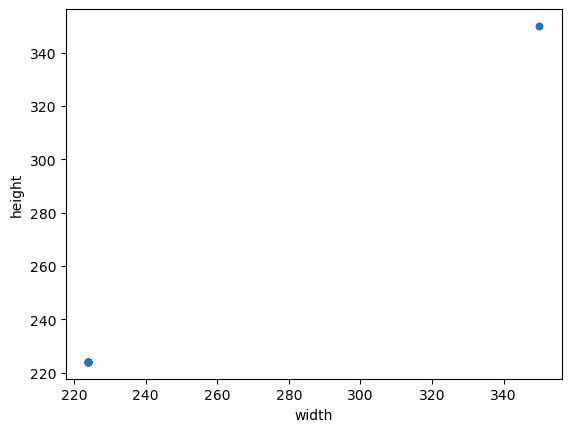

In [ ]:
df_bed_dims.plot.scatter(x = 'width', y = 'height')

<Axes: xlabel='width', ylabel='height'>

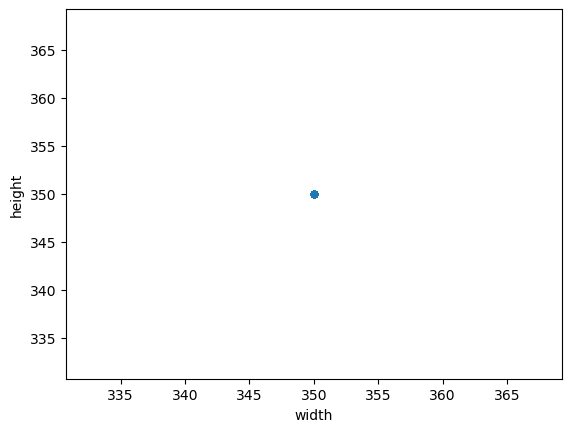

In [ ]:
df_chair_dims.plot.scatter(x = 'width', y = 'height')

<Axes: xlabel='width', ylabel='height'>

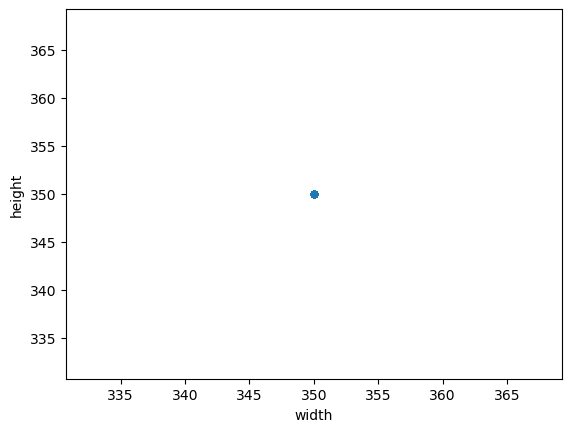

In [ ]:
df_dresser_dims.plot.scatter(x = 'width', y = 'height')

<Axes: xlabel='width', ylabel='height'>

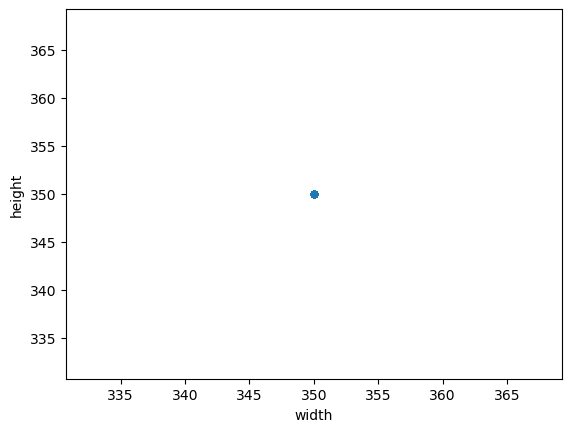

In [ ]:
df_lamp_dims.plot.scatter(x = 'width', y = 'height')

<Axes: xlabel='width', ylabel='height'>

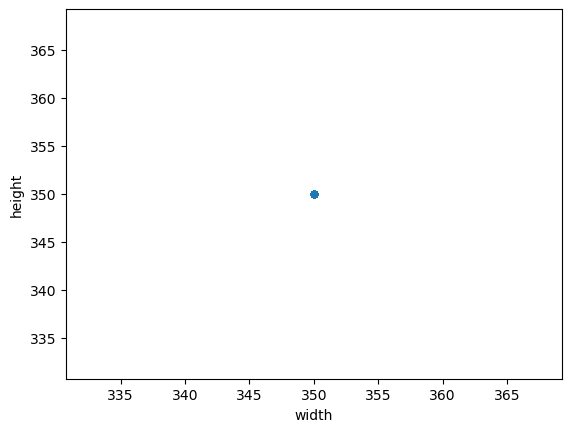

In [ ]:
df_sofa_dims.plot.scatter(x = 'width', y = 'height')

<Axes: xlabel='width', ylabel='height'>

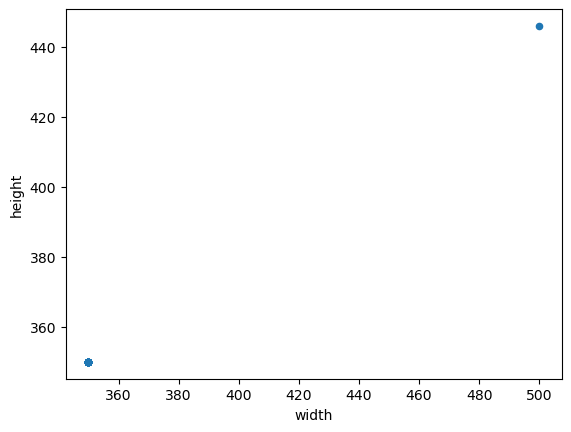

In [ ]:
df_table_dims.plot.scatter(x = 'width', y = 'height')

Investigate anomaly data in the dataframe

In [ ]:
df_table_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,15442.0,350.009714,1.207090,350.0,350.0,350.0,350.0,500.0
height,15442.0,350.006217,0.772537,350.0,350.0,350.0,350.0,446.0


## Conclusion

-   The dataset contains 6 categories of items with 90083 items total
-   The dataset contains all file with JPEG type
-   The dataset contains image mainly in two dimensions: 224x224 and 350x350. However there are one anomaly dimensions in the table category which is: 500x446
-